In [12]:
#import libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from operator import itemgetter

import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YOGITA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YOGITA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
%%writefile tokenizer_func.py

#import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from operator import itemgetter

#define tokenize function
def Tokenize():
    text = input()
    tokens = word_tokenize(text) #tokenize the words
    fdist = FreqDist(tokens) #find the frequency of words
    for f in fdist:
        print(f, fdist[f])
    min_5 = dict(sorted(fdist.items(), key=itemgetter(1))[:5]) #find the least 5 occuring words
    print("Least 5 occurring tokens:", min_5)
    return tokens

Overwriting tokenizer_func.py


In [17]:
#run the Tokenize function
from tokenizer_func import Tokenize
Tokenize()

NameError: name 'raw_input' is not defined

In [18]:
%%writefile removestopwords.py
#Remove stop words function
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def RemoveStopWords(token_list):
    stop_words = set(stopwords.words('english')) #copy stopwords to a list
    stop_removed = [w for w in token_list if w not in stop_words] #for loop to append the words to a list except stopwords
    return stop_removed

Overwriting removestopwords.py


In [19]:
#counting frequency of stop words in a string
import nltk
nltk.download('punkt')
from nltk import FreqDist
from nltk.tokenize import word_tokenize
string = input()
from removestopwords import RemoveStopWords

tokens = word_tokenize(string) #tokenize
stop_removed = RemoveStopWords(tokens) #remove stopwords

stop_present = [word for word in tokens if word not in stop_removed] #save stop words to a list
print(stop_present,'\n==========================================')

swfdist = FreqDist(stop_present) #find the frequency of stop words
print("Frequency Distribution of Stop Words:\n==========================================")
for f in swfdist:
    print("{}: {}".format(f, swfdist[f]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YOGITA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
['is', 'a', 'of', 'and', 'with', 'the', 'between', 'and', 'in', 'how', 'to', 'to', 'and', 'of'] 
Frequency Distribution of Stop Words:
and: 3
of: 2
to: 2
is: 1
a: 1
with: 1
the: 1
between: 1
in: 1
how: 1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YOGITA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Frequency of Stop words in the input')

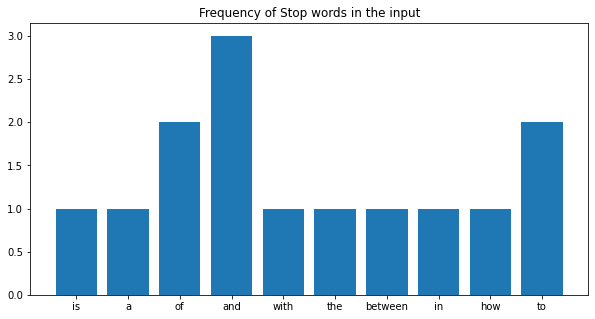

In [7]:
#plot a bar graph depicting frequency of stop words
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.bar(swfdist.keys(), swfdist.values())
plt.title("Frequency of Stop words in the input")

## TASK02

In [8]:
%%writefile lemma_stem.py
#lemmatize and stemming
#import libraries
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

#define lemmatize function
def Lemmatize(token_list):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in token_list]
    return lemmatized

#define stemming function
def Stemmed(token_list):
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in token_list]
    return stemmed

Writing lemma_stem.py


In [9]:
#implement lemmatizer and stemmer
text = "cries studies studied cried hurry hurried hurries jump jumped jumping jumps"
tokens = word_tokenize(text)

import lemma_stem
from lemma_stem import Lemmatize, Stemmed
lemma = Lemmatize(tokens)
stem = Stemmed(tokens)

#write the results to a Pandas dataframe
import pandas as pd
df = pd.DataFrame()
df['Original Word'] = tokens
df['Lemmatized Form'] = lemma
df['Stemmed Form'] = stem

print(df)
df.to_csv("StemmedAndLemmatizedResults.csv") #save the results to CSV file

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YOGITA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Original Word Lemmatized Form Stemmed Form
0          cries             cry          cri
1        studies           study        studi
2        studied         studied        studi
3          cried           cried          cri
4          hurry           hurry        hurri
5        hurried         hurried        hurri
6        hurries           hurry        hurri
7           jump            jump         jump
8         jumped          jumped         jump
9        jumping         jumping         jump
10         jumps            jump         jump


In [10]:
%%writefile PreProcess.py
#creating a PreProcess file
from tokenizer_func import Tokenize
from removestopwords import RemoveStopWords
from lemma_stem import Lemmatize

#defining Refine function to carry out the processing
def Refine():
    tokens = Tokenize()
    stop_remove = RemoveStopWords(tokens)
    lemmatized_words = Lemmatize(stop_remove)
    print('Tokenized: ', tokens)
    print('Stop Words Removed Copy: ', stop_remove)
    print('Lemmatized Words: ', lemmatized_words)

Writing PreProcess.py


In [11]:
#runt the refine function
from PreProcess import Refine
Refine()

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
language 3
, 3
and 3
of 2
computers 2
to 2
Natural 1
processing 1
( 1
NLP 1
) 1
is 1
a 1
subfield 1
linguistics 1
computer 1
science 1
artificial 1
intelligence 1
concerned 1
with 1
the 1
interactions 1
between 1
human 1
in 1
particular 1
how 1
program 1
process 1
analyze 1
large 1
amounts 1
natural 1
data 1
. 1
Least 5 occurring tokens: {'Natural': 1, 'processing': 1, '(': 1, 'NLP': 1, ')': 1}
Tokenized:  ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', ',', 'in', 'particular', 'how', 'to', 'prog